In [1]:
import numpy as np
import numpy as np 
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
new_df = pd.read_csv('../Data/167_features.csv')
new_df = new_df.loc[:, ~new_df.columns.str.contains('^Unnamed')]

In [3]:
x_list = list(new_df)
x_list = x_list[:-1]
# x_list

In [4]:
X = np.asarray(new_df[x_list])
Y = np.asarray(new_df['general_syntax#'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

In [5]:
lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
# print('Weights: ', lineReg.coef_)

Score:  0.16495745391104477


In [8]:
svm_initial_model = pickle.load(open('../models/svm_initial_model.sav', 'rb'))
y_pred = svm_initial_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5201169020944959


In [9]:
svc_model2 = pickle.load(open('../models/poly_svc_model2.sav', 'rb'))

In [10]:
y_pred = svc_model2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8192888455918168


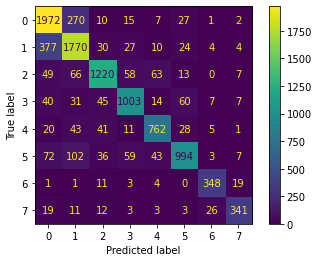

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=svc_model2.classes_)
disp.plot()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2304
           1       0.77      0.79      0.78      2246
           2       0.87      0.83      0.85      1476
           3       0.85      0.83      0.84      1207
           4       0.84      0.84      0.84       911
           5       0.87      0.76      0.81      1316
           6       0.88      0.90      0.89       387
           7       0.88      0.82      0.85       418

    accuracy                           0.82     10265
   macro avg       0.84      0.83      0.83     10265
weighted avg       0.82      0.82      0.82     10265



# 10 classes 

In [6]:
svc_model3 = pickle.load(open('../models/poly_svc_model3.sav', 'rb'))

In [8]:
y_pred = svc_model3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8264969785753525


In [9]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='rocket_r') # cmap='rocket_r'
    #plt.savefig(filename)
    plt.show()

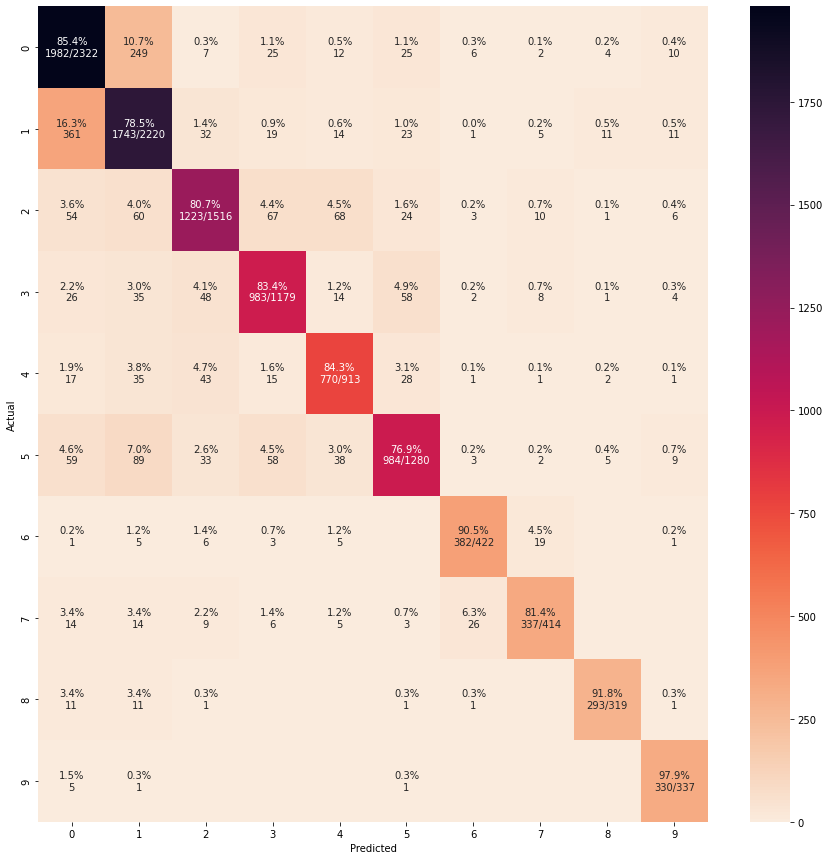

In [19]:
cm_analysis(y_test, y_pred, svc_model3.classes_, ymap=None, figsize=(15,15))

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      2322
           1       0.78      0.79      0.78      2220
           2       0.87      0.81      0.84      1516
           3       0.84      0.83      0.83      1179
           4       0.83      0.84      0.84       913
           5       0.86      0.77      0.81      1280
           6       0.90      0.91      0.90       422
           7       0.88      0.81      0.84       414
           8       0.92      0.92      0.92       319
           9       0.88      0.98      0.93       337

    accuracy                           0.83     10922
   macro avg       0.85      0.85      0.85     10922
weighted avg       0.83      0.83      0.83     10922



# Hypertuned Testing(improved ~92% accuracy)

In [6]:
# SVC(kernel='poly', degree=4, gamma='auto', coef0=1, C=10)
svc_model4 = pickle.load(open('../models/poly_svc_model4.sav', 'rb'))
y_pred = svc_model4.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9163156930965025


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2396
           1       0.89      0.91      0.90      2199
           2       0.93      0.91      0.92      1473
           3       0.91      0.92      0.91      1155
           4       0.92      0.90      0.91       896
           5       0.91      0.91      0.91      1321
           6       0.94      0.96      0.95       428
           7       0.94      0.91      0.93       407
           8       0.97      0.96      0.97       334
           9       0.93      0.93      0.93       313

    accuracy                           0.92     10922
   macro avg       0.93      0.92      0.92     10922
weighted avg       0.92      0.92      0.92     10922



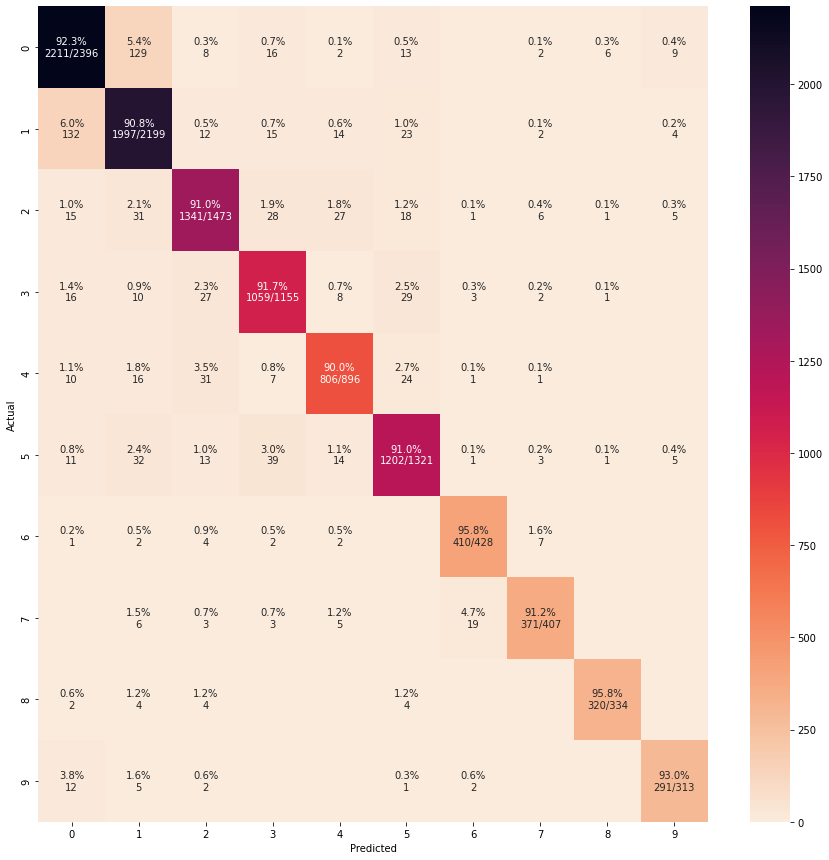

In [10]:
cm_analysis(y_test, y_pred, svc_model4.classes_, ymap=None, figsize=(15,15))